In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk import WordNetLemmatizer
import string
#display full dataframe information
pd.set_option('display.max_colwidth', 50)
import pandas as pd
df = pd.read_csv(r"C:\Users\efere\Downloads\archive\Fake.csv")
df1 =  pd.read_csv(r"C:\Users\efere\Downloads\archive\True.csv")

In [2]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
df['Category'] = 0
df1['Category'] = 1

In [7]:
df.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_final = pd.concat([df, df1])
df_final

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [17]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in string.punctuation]))
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
def return_sentence(tokens):
    return (" ".join([str(word) for word in tokens]))

In [18]:
removed_punc = df_final['text'].apply(lambda x: remove_punct(x))
tokens = removed_punc.apply(lambda x: tokenize(x))
lemmatized_words = tokens.apply(lambda x: lemmatize(x))
final_text = lemmatized_words.apply(lambda x: return_sentence(x))
X = final_text
y = df_final['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [24]:
state = 42
regularization_parameter = 1
classifiers = {
    'Passive Aggressive Classifier' : PassiveAggressiveClassifier(
        C = regularization_parameter,
        max_iter=50,
        random_state=state
    ),
    'Logistic Regression' : LogisticRegression(
        C = regularization_parameter,
        random_state=state
    ),
    'Multi-Nominal Naive Bayes' : MultinomialNB()
}

Passive Aggressive Classifier: 43
Accuracy of 99.52% was obtained using Passive Aggressive Classifier
Accuracy of 98.78%, with a percent standard deviation of 0.31% using cross-validation
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4713
           1       1.00      0.99      0.99      4267

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Logistic Regression: 132
Accuracy of 98.53% was obtained using Logistic Regression
Accuracy of 96.84%, with a percent standard deviation of 0.66% using cross-validation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.98      0.98      0.98      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99 

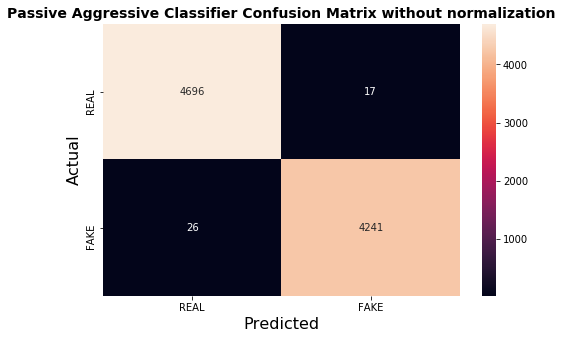

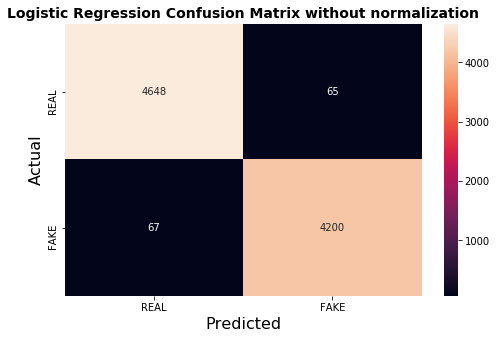

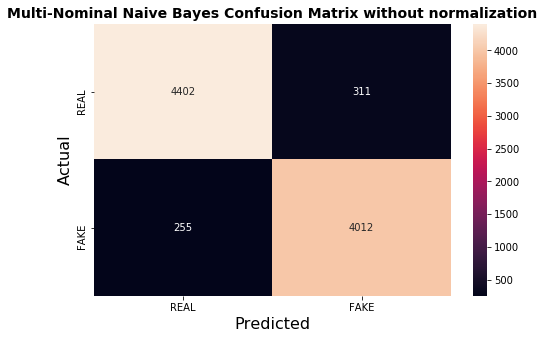

In [25]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(tfidf_train, y_train)
    y_hat = clf.predict(tfidf_test)
    score = accuracy_score(y_test, y_hat)
    n_errors = (y_test!=y_hat).sum()
    cvs_score = cross_val_score(clf, tfidf_vectorizer.transform(X), y, cv=5)
    print(f"{clf_name}: {n_errors}")
    print(f'Accuracy of {round(score*100, 2)}% was obtained using {clf_name}')
    print(f'Accuracy of {round(cvs_score.mean()*100, 2)}%, '
          f'with a percent standard deviation of {round(cvs_score.std()*100,2)}% using cross-validation')
    print(classification_report(y_test, y_hat))
    plt.figure(figsize=(8,5))
    cm = confusion_matrix(y_test, y_hat)
    #fmt helps to change the display of the integer to the desired format
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL','FAKE'])
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title(f'{clf_name} Confusion Matrix without normalization', fontsize=14, fontweight='bold')